In [31]:
#pip install scikit-learn

In [70]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import datetime
from sklearn.ensemble import RandomForestRegressor
#os.getcwd()

In [163]:
##関数
def trend_fig(timestamp, y):
    figsize = [32.0/2.57, 6.0/2.57]
    fig = plt.figure(figsize=figsize, dpi=200);
    ax = fig.add_subplot(1,1,1)
    ax.plot(timestamp, y, "-", color="blue")
    #ax.plot(training_x, prediction_y,"-", color="red")
    #ax.legend(["actual","predicted"], loc="upper right")
    plt.rcParams["font.size"] = 10
    ax.grid()
    ax.tick_params(axis='x', labelrotation=0)
    #plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=0.5)
    plt.tight_layout()
    plt.show()
    return
    #os.chdir(folder_name)
    #picturename = "sin_prediction.png"
    #plt.savefig(picturename)
    #plt.clf()
    #plt.close()
    
def trend_fig_comp(timestamp, act, pre):
    figsize = [32.0/2.57, 6.0/2.57]
    fig = plt.figure(figsize=figsize, dpi=200);
    ax = fig.add_subplot(1,1,1)
    ax.plot(timestamp, act, "-", color="red", linewidth=0.5)
    ax.plot(timestamp, pre, "--", color="blue", linewidth=0.5)
    plt.ylim([0, 750])
    plt.rcParams["font.size"] = 10
    ax.grid()
    ax.tick_params(axis='x', labelrotation=0)
    plt.tight_layout()
    plt.savefig("trend.png")
    plt.show()
    return

def trend_fig_comp2(timestamp, act, pre):
    figsize = [32.0/2.57, 6.0/2.57]
    fig = plt.figure(figsize=figsize, dpi=200);
    ax = fig.add_subplot(1,1,1)
    ax.plot(timestamp, act, "-", color="red", linewidth=0.5)
    ax.plot(timestamp, pre, "--", color="blue", linewidth=0.5)
    #plt.ylim([0, 750])
    plt.rcParams["font.size"] = 10
    ax.grid()
    ax.tick_params(axis='x', labelrotation=0)
    plt.tight_layout()
    plt.savefig("trend.png")
    plt.show()
    return
    
def RF(train_x, train_y, num_tree, random_state):
    train_x = train_x.reshape(-1, 1)
    train_y = train_y.ravel()
    mdl = RandomForestRegressor()
    mdl.n_estimators = num_tree
    mdl.random_state = random_state
    mdl.fit(train_x, train_y)
    return mdl

def error_cal(act, pre):
    abs_error = np.abs(act - pre)
    rel_error = abs_error / act
    MAPE = rel_error.mean()
    RMSE = (abs_error**2).mean()**0.5
    return MAPE, RMSE

In [34]:
os.getcwd()

'/root/truckline'

In [4]:
##幹線データの読み取り
# data_set = pd.read_excel("/home/studio-lab-user/Sewage-trunk-line/truckline/data/幹線データ.xlsx", sheet_name="2018年7月~2020年12月")
data_set = pd.read_excel("/root/truckline/data/幹線データ.xlsx", sheet_name="2018年7月~2020年12月")

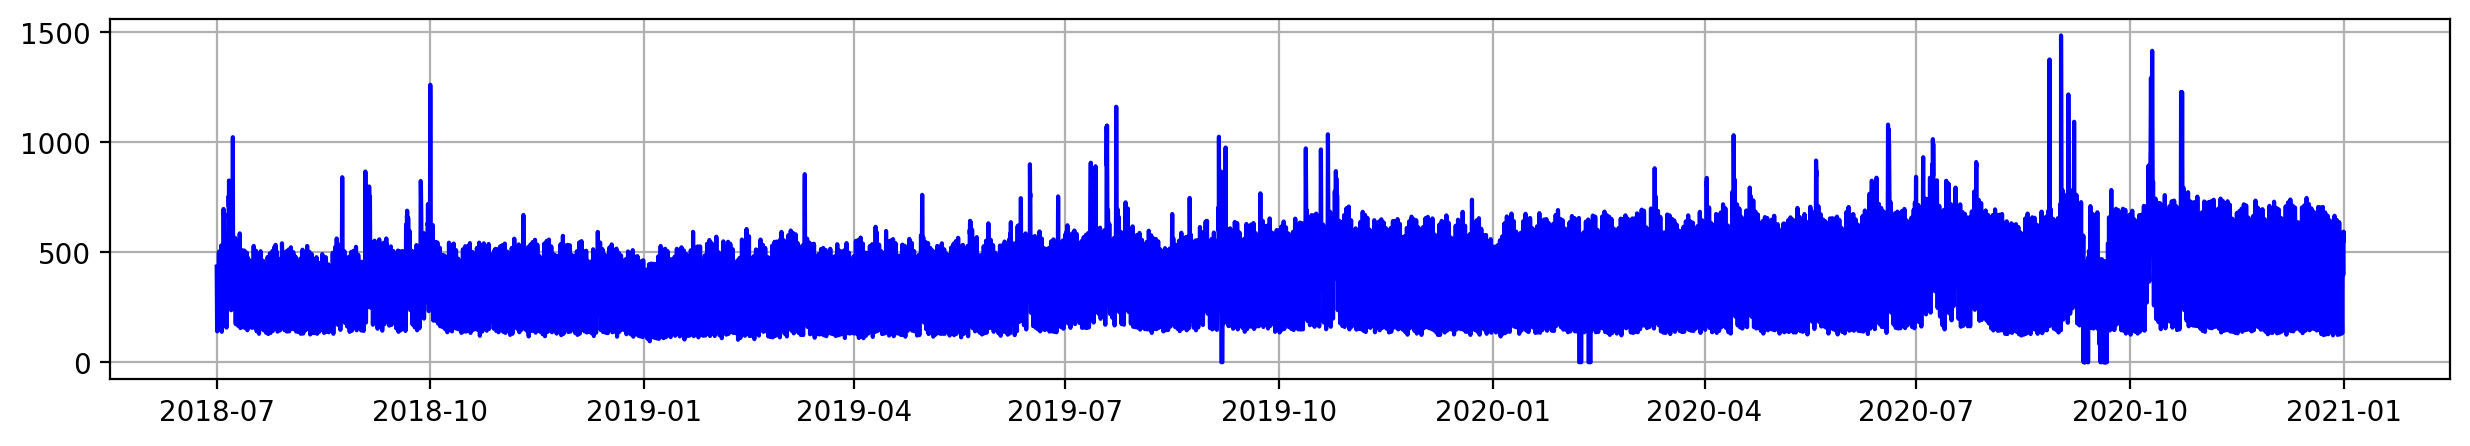

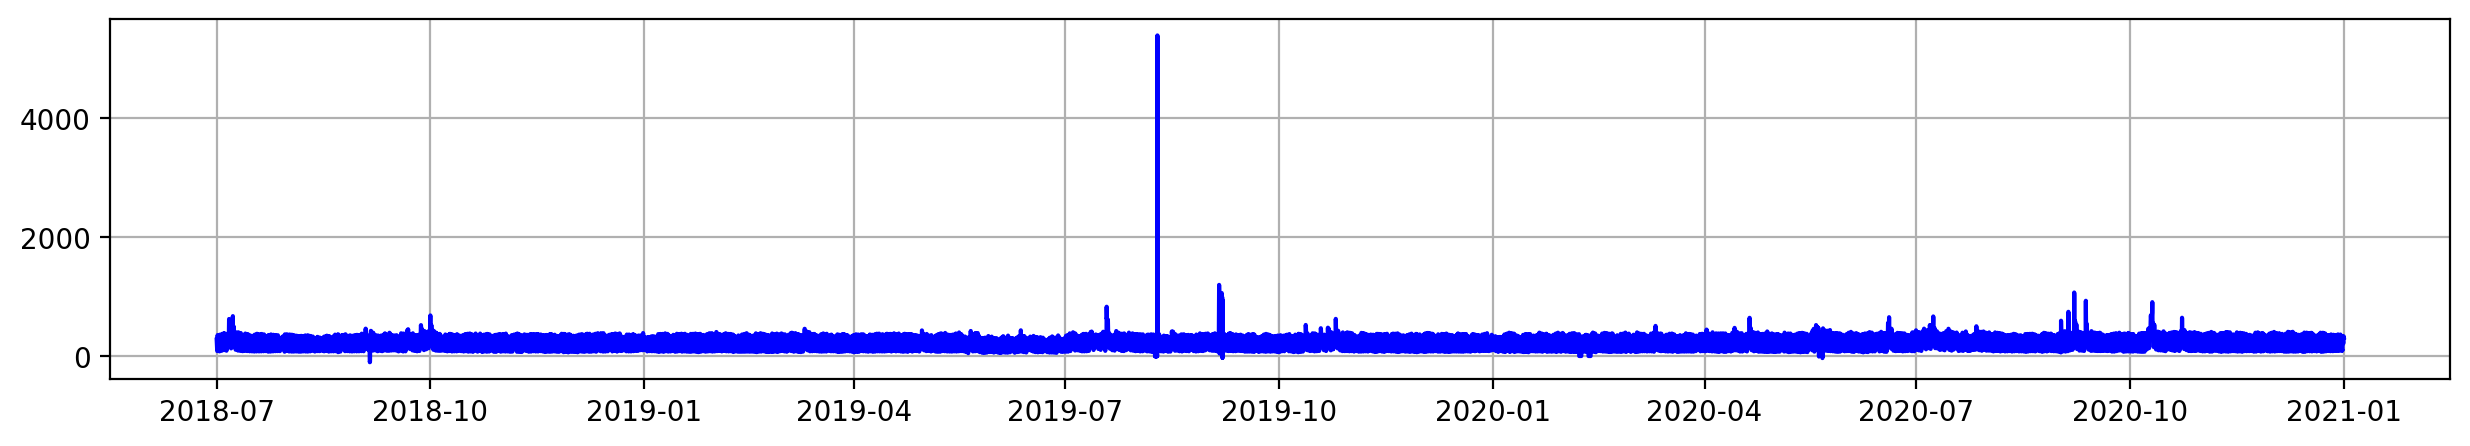

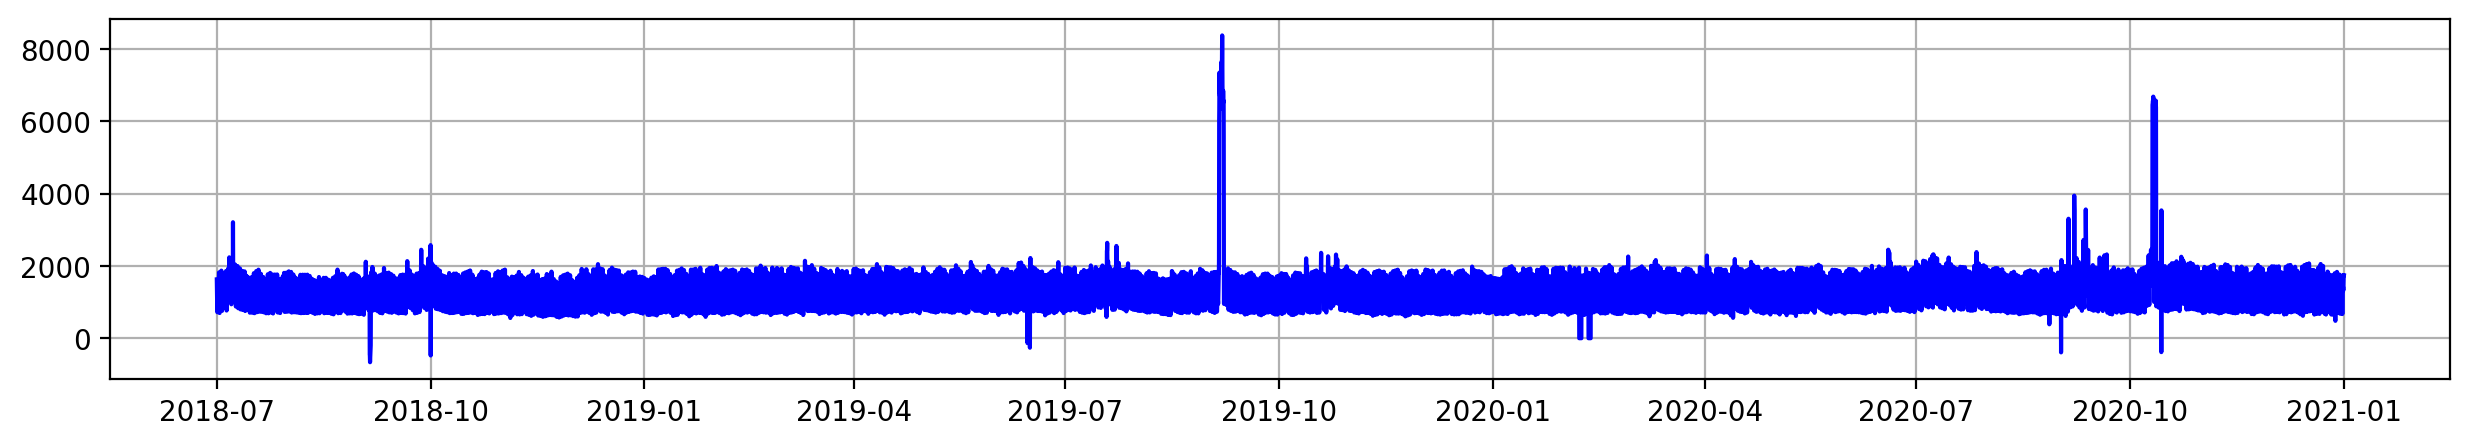

In [5]:
#各市の幹線流量
data_city = pd.DataFrame(data_set.iloc[(np.arange(5,len(data_set))),[0,14,15,16]])\
.rename(columns={"Unnamed: 0":"timestamp"}).reset_index().drop("index", axis=1)
data_city.head
data_city["timestamp"] = data_city["timestamp"].dt.round("min")
#市の幹線流量のトレンド確認
trend_fig(data_city.timestamp, data_city.亀山市.array)
trend_fig(data_city.timestamp, data_city.四日市市.array)
trend_fig(data_city.timestamp, data_city.鈴鹿市.array)

In [37]:
data_city.head

<bound method NDFrame.head of                 timestamp 四日市市   鈴鹿市  亀山市
0     2018-07-01 01:00:00  275  1626  434
1     2018-07-01 02:00:00  230  1485  358
2     2018-07-01 03:00:00  180  1234  317
3     2018-07-01 04:00:00  124  1046  232
4     2018-07-01 05:00:00  104   904  168
...                   ...  ...   ...  ...
21955 2020-12-31 20:00:00  304  1515  524
21956 2020-12-31 21:00:00  328  1677  593
21957 2020-12-31 22:00:00  331  1745  568
21958 2020-12-31 23:00:00  321  1723  571
21959 2021-01-01 00:00:00  310  1739  552

[21960 rows x 4 columns]>

In [6]:
##気象実績データの読み取り
# home = "/home/studio-lab-user/"
# weather_path = home + "Sewage-trunk-line/data/気温・降雨量・湿度データ（四日市、亀山、鈴鹿）.xlsx"
weather_path = "/root/truckline/data/気温・降雨量・湿度データ（四日市、亀山、鈴鹿）.xlsx"
weather_temp = pd.read_excel(weather_path, sheet_name="気温")
weather_rain = pd.read_excel(weather_path, sheet_name="降雨量")
weather_hum = pd.read_excel(weather_path, sheet_name="湿度（四日市のみ）")

weather_temp = weather_temp.iloc[(np.arange(5,len(weather_temp))), [0,1,4,7]].reset_index().drop("index", axis=1)
weather_temp.columns = ["timestamp", "四日市市", "亀山市", "鈴鹿市"]
weather_rain = weather_rain.iloc[(np.arange(5,len(weather_rain))), [0,1,5,8]].reset_index().drop("index", axis=1)
weather_rain.columns = ["timestamp", "四日市市", "亀山市", "鈴鹿市"]
weather_hum = weather_hum.iloc[(np.arange(5,len(weather_hum))), [0,1]].reset_index().drop("index", axis=1)
weather_hum.columns = ["timestamp", "四日市市"]

In [39]:
print(weather_temp.head(),\
weather_rain.head(),\
weather_hum.head())

             timestamp  四日市市   亀山市   鈴鹿市
0  2018-07-01 01:00:00  24.8    25  25.1
1  2018-07-01 02:00:00  24.4    25  24.8
2  2018-07-01 03:00:00  24.3  24.9  24.4
3  2018-07-01 04:00:00  24.3  24.9  24.3
4  2018-07-01 05:00:00  24.3  24.6  24.3              timestamp 四日市市 亀山市 鈴鹿市
0  2018-07-01 01:00:00    0   0   0
1  2018-07-01 02:00:00    0   0   0
2  2018-07-01 03:00:00    0   0   0
3  2018-07-01 04:00:00    0   0   0
4  2018-07-01 05:00:00    0   0   0              timestamp 四日市市
0  2018-07-01 01:00:00  100
1  2018-07-01 02:00:00  100
2  2018-07-01 03:00:00  100
3  2018-07-01 04:00:00  100
4  2018-07-01 05:00:00  100


In [7]:
##時刻ステップ
datetime.time()
data_city.timestamp.dt.hour
timestep = np.asarray(data_city.timestamp.dt.hour)

In [8]:
##気象予報データの読み取り
# temp_path = home + "Sewage-trunk-line/truckline/data/予報データ（気温）_12 intervals.xlsx"
# rain_path = home + "Sewage-trunk-line/truckline/data/予報データ（降水量）_12 intervals.xlsx"
# hum_path = home + "Sewage-trunk-line/truckline/data/予報データ（湿度）_12 intervals.xlsx"
temp_path = "/root/truckline/data/予報データ（気温）_12 intervals.xlsx"
rain_path = "/root/truckline/data/予報データ（降水量）_12 intervals.xlsx"
hum_path = "/root/truckline/data/予報データ（湿度）_12 intervals.xlsx"
sheet_name_temp = ["201905-201909_気温連続データ", "202005-202009_気温連続データ"]
sheet_name_rain = ["201905-201909_降水量連続データ", "202005-202009_降水量連続データ"]
sheet_name_hum = ["201905-201909_湿度連続データ", "202005-202009_湿度連続データ"]
temp_set_a = pd.read_excel(temp_path, sheet_name=sheet_name_temp[0]).drop("予報基準時刻", axis=1)
rain_set_a = pd.read_excel(rain_path, sheet_name=sheet_name_rain[0]).drop("予報基準時刻", axis=1)
hum_set_a = pd.read_excel(hum_path, sheet_name=sheet_name_hum[0]).drop("予報基準時刻", axis=1)
temp_set_b = pd.read_excel(temp_path, sheet_name=sheet_name_temp[1]).drop("予報基準時刻", axis=1)
rain_set_b = pd.read_excel(rain_path, sheet_name=sheet_name_rain[1]).drop("予報基準時刻", axis=1)
hum_set_b = pd.read_excel(hum_path, sheet_name=sheet_name_hum[1]).drop("予報基準時刻", axis=1)

In [9]:
##nan処理
array_nan = data_city.isnull().any(axis=1) + weather_temp.isnull().any(axis=1) + weather_rain.isnull().any(axis=1) + weather_hum.isnull().any(axis=1)
print(data_city[array_nan].index)
timestamp_all = data_city["timestamp"].drop(index = data_city[array_nan].index, axis=1)
y_all = data_city["亀山市"].drop(index = data_city[array_nan].index, axis=1)
print(len(data_city[array_nan].index))
#print(len(test_t))
print(len(data_city))
print(y_all)

Int64Index([ 1578,  1579,  1584,  1585,  1586,  1587,  1588, 13713, 13714,
            13715, 15963, 15964, 17890, 21417, 21418, 21419, 21420, 21421,
            21422, 21423],
           dtype='int64')
20
21960
0        434
1        358
2        317
3        232
4        168
        ... 
21955    524
21956    593
21957    568
21958    571
21959    552
Name: 亀山市, Length: 21940, dtype: object


In [10]:
#学習？
#train_x = pd.concat([weather_temp["亀山市"], weather_rain["亀山市"]], axis=1).dropna(axis=0)
#train_y = data_city[data_city.timestamp == ]
#mdl = RF(train_x, data_city.亀山市.array, 300, 100)
#train_x
#print(hum_set_a)
#print(weather_hum[data_city.timestamp.dt.date > (test_time_a[0] + datetime.timedelta(hours=-12)).date()])
pd.DataFrame(timestep)[data_city.timestamp.dt.date >= test_time_b[0].date()].reset_index()
temp_set_b.予報日.dt.round('min').dt.hour

NameError: name 'test_time_b' is not defined

In [183]:
##学習・検証期間の設定
#評価期間a：2019年5月1日 ～ 2019年10月1日
#評価期間b：2020年5月1日 ～ 2020年9月29日
test_time_a = temp_set_a.予報日.dt.round("min")
test_time_b = temp_set_b.予報日.dt.round("min")
print(test_time_a)

#学習データ
ver = 1 # a:1, b:2
if ver == 1: #検証期間 a に対する学習データ
    train_Y = data_city[data_city.timestamp.dt.date <= (test_time_a[0] + datetime.timedelta(hours=-12)).date()]
    train_X = pd.concat([weather_temp[data_city.timestamp.dt.date <= (test_time_a[0] + datetime.timedelta(hours=-12)).date()],
                        weather_rain[data_city.timestamp.dt.date <= (test_time_a[0] + datetime.timedelta(hours=-12)).date()].drop(["timestamp"], axis=1),
                        weather_hum[data_city.timestamp.dt.date <= (test_time_a[0] + datetime.timedelta(hours=-12)).date()].drop(["timestamp"], axis=1), 
                        pd.DataFrame(timestep)[data_city.timestamp.dt.date <= (test_time_a[0] + datetime.timedelta(hours=-12)).date()]],axis=1)
    train_X.columns = ["timestamp","気温四日市市","気温亀山市","気温鈴鹿市","降雨量四日市市","降雨量亀山市","降雨量鈴鹿市","湿度四日市市","timestep"]
else:        #検証期間 b に対する学習データ
    train_Y = data_city[data_city.timestamp.dt.date <= (test_time_b[0] + datetime.timedelta(hours=-12)).date()]
    train_X = pd.concat([weather_temp[data_city.timestamp.dt.date <= (test_time_b[0] + datetime.timedelta(hours=-12)).date()],
                        weather_rain[data_city.timestamp.dt.date <= (test_time_b[0] + datetime.timedelta(hours=-12)).date()].drop(["timestamp"], axis=1),
                        weather_hum[data_city.timestamp.dt.date <= (test_time_b[0] + datetime.timedelta(hours=-12)).date()].drop(["timestamp"], axis=1), 
                        pd.DataFrame(timestep)[data_city.timestamp.dt.date <= (test_time_b[0] + datetime.timedelta(hours=-12)).date()]],axis=1)
    train_X.columns = ["timestamp","気温四日市市","気温亀山市","気温鈴鹿市","降雨量四日市市","降雨量亀山市","降雨量鈴鹿市","湿度四日市市","timestep"]
    
#計画データ
if ver == 1:
    test_Y = data_city[data_city.timestamp.dt.date > (test_time_a[0] + datetime.timedelta(hours=-12)).date()]
    test_X = pd.concat([temp_set_a.iloc[:,[2,1,3]],
                        rain_set_a.iloc[:,[2,1,3]],
                        hum_set_a.iloc[:,[2]],
                        test_time_a.dt.hour],axis=1)
    test_time = test_time_a
else:
    test_Y = data_city[data_city.timestamp.dt.date >= test_time_b[0].date()]
    test_X = pd.concat([temp_set_b.iloc[:,[2,1,3]],
                        rain_set_b.iloc[:,[2,1,3]],
                        hum_set_b.iloc[:,[2]],
                        test_time_b.dt.hour],axis=1)
    test_time = test_time_b
print(train_X, train_Y, test_X, test_Y)
np.asarray(train_Y.四日市市)

0      2019-05-01 10:00:00
1      2019-05-01 11:00:00
2      2019-05-01 12:00:00
3      2019-05-01 13:00:00
4      2019-05-01 14:00:00
               ...        
3667   2019-10-01 05:00:00
3668   2019-10-01 06:00:00
3669   2019-10-01 07:00:00
3670   2019-10-01 08:00:00
3671   2019-10-01 09:00:00
Name: 予報日, Length: 3672, dtype: datetime64[ns]
                timestamp 気温四日市市 気温亀山市 気温鈴鹿市 降雨量四日市市 降雨量亀山市 降雨量鈴鹿市 湿度四日市市  \
0     2018-07-01 01:00:00   24.8    25  25.1       0      0      0    100   
1     2018-07-01 02:00:00   24.4    25  24.8       0      0      0    100   
2     2018-07-01 03:00:00   24.3  24.9  24.4       0      0      0    100   
3     2018-07-01 04:00:00   24.3  24.9  24.3       0      0      0    100   
4     2018-07-01 05:00:00   24.3  24.6  24.3       0      0      0    100   
...                   ...    ...   ...   ...     ...    ...    ...    ...   
7290  2019-04-30 19:00:00   15.6  15.9  15.9       0      0      0    100   
7291  2019-04-30 20:00:00   15.5  15.8  

array([275, 230, 180, ..., 317, 347, 374], dtype=object)

In [154]:
#長期予測
def prediction_normal(city):
    if city == 1:
        nanarray = train_X.iloc[:, [1,4,7,8]].isnull().any(axis=1)
        X = train_X.iloc[:, [1,4,7,8]].dropna(axis=0)
        Y = train_Y.drop(index=train_Y[nanarray].index, axis=1)
        act = data_city[data_city.timestamp.isin(test_time)].四日市市
        mdl = RF(np.asarray(X), np.asarray(Y.四日市市), 300, 100)
        pre = mdl.predict(np.asarray(test_X.iloc[:,[0,3,6,7]]))
        df_result = pd.concat([act.reset_index().drop(columns="index"), 
                               pd.DataFrame(pre)], axis=1).to_csv("result四日市市_"+ "検証期間" + str(ver) + ".csv", encoding="cp932")
        
    elif city == 2:
        nanarray = train_X.iloc[:, [2,5,7,8]].isnull().any(axis=1)
        X = train_X.iloc[:, [2,5,7,8]].dropna(axis=0)
        Y = train_Y.drop(index=train_Y[nanarray].index, axis=1)
        act = data_city[data_city.timestamp.isin(test_time)].亀山市
        mdl = RF(np.asarray(X), np.asarray(Y.亀山市), 300, 100)
        pre = mdl.predict(np.asarray(test_X.iloc[:,[1,4,6,7]]))
        df_result = pd.concat([act.reset_index().drop(columns="index"), 
                               pd.DataFrame(pre)], axis=1).to_csv("result亀山市_"+ "検証期間" + str(ver) + ".csv", encoding="cp932")
        
    else:
        nanarray = train_X.iloc[:, [3,6,7,8]].isnull().any(axis=1)
        X = train_X.iloc[:, [3,6,7,8]].dropna(axis=0)
        Y = train_Y.drop(index=train_Y[nanarray].index, axis=1)
        strarray = np.asarray(X[~X.applymap(np.isreal).all(axis=1)].index) # 鈴鹿市の気温配列に '-' が存在するため、削除
        X = X.drop(index=strarray, axis=1)
        Y = Y.drop(index=strarray, axis=1)
        act = data_city[data_city.timestamp.isin(test_time)].鈴鹿市
        mdl = RF(np.asarray(X), np.asarray(Y.鈴鹿市), 300, 100)
        pre = mdl.predict(np.asarray(test_X.iloc[:,[2,5,6,7]]))
        df_result = pd.concat([act.reset_index().drop(columns="index"), 
                               pd.DataFrame(pre)], axis=1).to_csv("result鈴鹿市_"+ "検証期間" + str(ver) + ".csv", encoding="cp932")
        
    return np.float64(act), np.asarray(pre)
#trend_fig_comp(test_time, np.asarray(act), np.asarray(pre))
act1, pre1 = prediction_normal(1)
act2, pre2 = prediction_normal(2)
act3, pre3 = prediction_normal(3)

In [ ]:
#短期予測
city = 1
pre_all = []
#for i in range(len(test_time)):
for i in range(len(test_time)):
    train_Y = data_city[data_city.timestamp < test_time[i]]
    train_X = pd.concat([weather_temp[data_city.timestamp < test_time[i]],
                        weather_rain[data_city.timestamp < test_time[i]].drop(["timestamp"], axis=1),
                        weather_hum[data_city.timestamp < test_time_a[i]].drop(["timestamp"], axis=1), 
                        pd.DataFrame(timestep)[data_city.timestamp < test_time_a[i]]],axis=1)
    if city == 1:
        col = [1,4,7,8]
        col_ = [0,3,6,7]
        nanarray = train_X.iloc[:, col].isnull().any(axis=1)
        X = train_X.iloc[:, col].dropna(axis=0)
        Y = train_Y.drop(index=train_Y[nanarray].index, axis=1)
        Y_ = Y.四日市市
        act = data_city[data_city.timestamp.isin(test_time)].四日市市
    elif city ==2:
        col = [2,5,7,8]
        col_ = [1,4,6,7]
        nanarray = train_X.iloc[:, col].isnull().any(axis=1)
        X = train_X.iloc[:, col].dropna(axis=0)
        Y = train_Y.drop(index=train_Y[nanarray].index, axis=1)
        Y_ = Y.亀山市
        act = data_city[data_city.timestamp.isin(test_time)].亀山市
    else:
        col = [3,6,7,8]
        col_ = [2,5,6,7]
        nanarray = train_X.iloc[:, col].isnull().any(axis=1)
        X = train_X.iloc[:, col].dropna(axis=0)
        Y = train_Y.drop(index=train_Y[nanarray].index, axis=1)
        strarray = np.asarray(X[~X.applymap(np.isreal).all(axis=1)].index) # 鈴鹿市の気温配列に '-' が存在するため、削除
        X = X.drop(index=strarray, axis=1)
        Y = Y.drop(index=strarray, axis=1)
        Y_ = Y.鈴鹿市
        act = data_city[data_city.timestamp.isin(test_time)].鈴鹿市
        
    if test_time[i].hour + test_time[i].minute + test_time[i].second == 0:
        mdl = RF(np.asanyarray(X), np.asarray(Y_), 300,100)
    
    if mdl != []:
        pre = mdl.predict(np.asarray(test_X.iloc[i,col_]))
    pre_all.append(pre)

In [205]:
test_X.iloc[14, :]

予報値_四日市市    14.6
予報値_亀山市     13.4
予報値_鈴鹿市     14.5
予報値_四日市市     0.0
予報値_亀山市      0.0
予報値_鈴鹿市      0.0
予報値_四日市市    81.0
予報日          0.0
Name: 14, dtype: float64

In [208]:
test_X.iloc[:,7]

0       10
1       11
2       12
3       13
4       14
        ..
3667     5
3668     6
3669     7
3670     8
3671     9
Name: 予報日, Length: 3672, dtype: int64

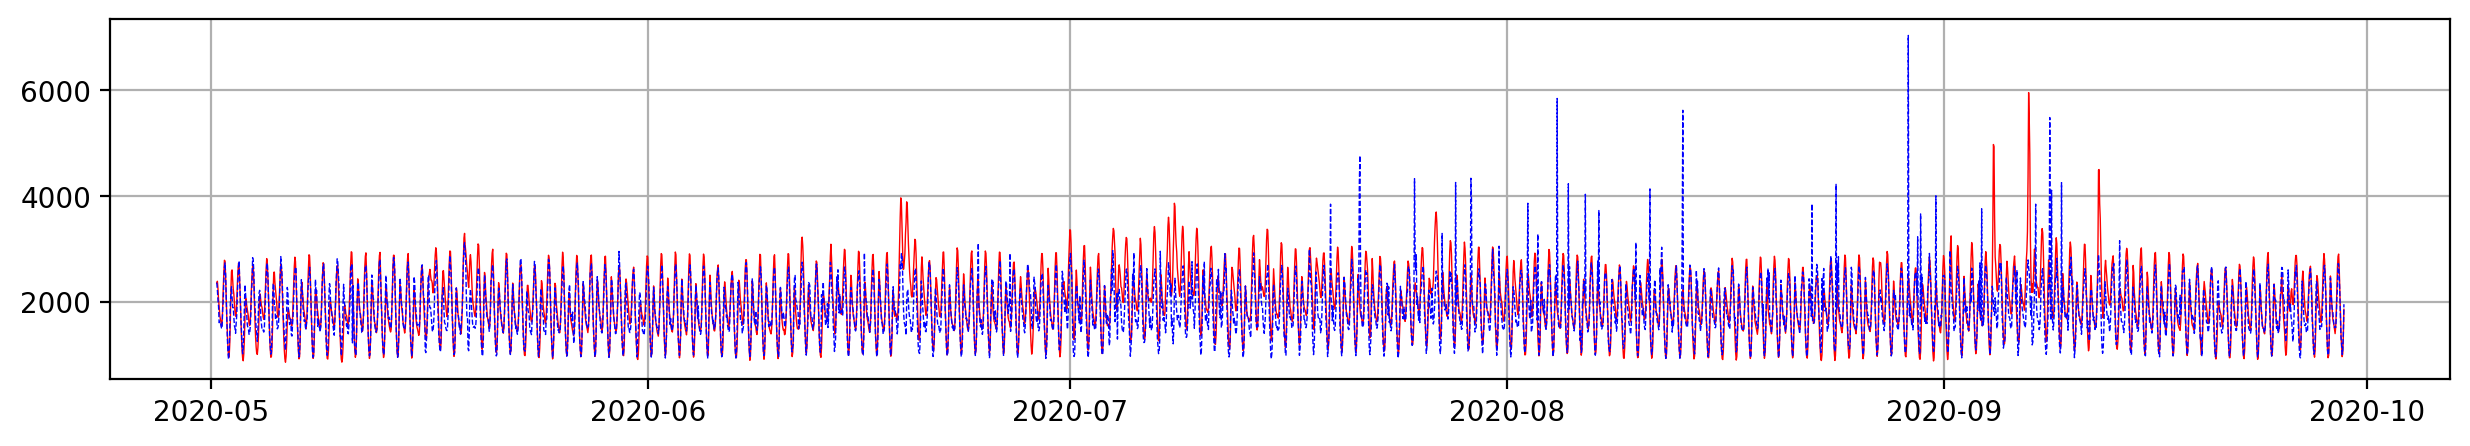

(0.1100447582213101, 385.8156566756802)

In [164]:
trend_fig_comp2(test_time, (act1 + act2 +act3), (pre1 + pre2 + pre3))
error_cal((act1 + act2 +act3), (pre1 + pre2 + pre3))